In [ ]:
# Instalar scikit-learn (si no lo tienes) que incluye Random Forest
!pip install scikit-learn



Distribución de casos:
Resultado
1    523
0    495
Name: count, dtype: int64


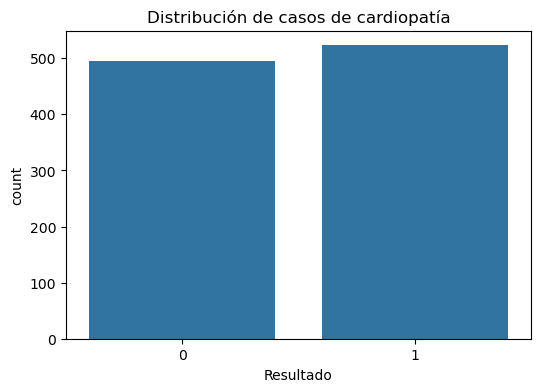

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 1. Cargar los datos (igual que en tu código original)
dataframe = pd.read_csv('DS_Prediccion_de_Cardiopatia_SinDatosPerdidos.csv', sep=';')
clasificadores = ['No Cardiopatía', 'Cardiopatía']


# 3. Distribución de la variable objetivo
print("\nDistribución de casos:")
print(dataframe['Resultado'].value_counts())

# 4. Gráfico de conteo
plt.figure(figsize=(6,4))
sns.countplot(x='Resultado', data=dataframe)
plt.title('Distribución de casos de cardiopatía')
plt.show()



In [2]:
# 5. Preparar datos
y = dataframe['Resultado']
X = dataframe.drop('Resultado', axis=1)

# 6. Dividir datos (manteniendo tus mismos parámetros)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# 7. Crear modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=3,       # Profundidad máxima de los árboles
    random_state=30    # Semilla aleatoria para reproducibilidad
)

# 8. Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# 9. Hacer predicciones
predicciones = modelo_rf.predict(X_test)

# 10. Matriz de confusión (igual formato que tu código)
tn, fp, fn, tp = confusion_matrix(y_test, predicciones).ravel()
labels = ["No Cardiopatía", "Cardiopatía"]
matriz = confusion_matrix(y_test, predicciones, labels=[0,1])
print("\nMatriz de confusión:")
print(pd.DataFrame(matriz, index=labels, columns=labels))

# 11. Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, predicciones, target_names=clasificadores))




Matriz de confusión:
                No Cardiopatía  Cardiopatía
No Cardiopatía             109           28
Cardiopatía                 18          151

Reporte de clasificación:
                precision    recall  f1-score   support

No Cardiopatía       0.86      0.80      0.83       137
   Cardiopatía       0.84      0.89      0.87       169

      accuracy                           0.85       306
     macro avg       0.85      0.84      0.85       306
  weighted avg       0.85      0.85      0.85       306



In [3]:
# 12. Ejemplo de predicción (mismo formato que tu código)
# Datos de ejemplo: [Edad, Sexo, Tipo_Dolor_Pecho, Presion_Arterial, Colesterol, 
# Nivel_Azucar_Ayunas, Res_Electrocardiografico, Frecuencia_Cardiaca, 
# Angina_Inducida, DepresionST, DepresionST_Pendiente, NumeroVasos, Prueba_Tálio]
ejemplo = [[52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3]]

# Predicción
print("\nPredicción para ejemplo:")
print(modelo_rf.predict(ejemplo))
print("Probabilidades:")
print(modelo_rf.predict_proba(ejemplo))




Predicción para ejemplo:
[0]
Probabilidades:
[[0.74708042 0.25291958]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
